<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-can-we-do-with-geoqueries?" data-toc-modified-id="What-can-we-do-with-geoqueries?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What can we do with geoqueries?</a></span></li><li><span><a href="#We-generate-the-connection-with-Mongo" data-toc-modified-id="We-generate-the-connection-with-Mongo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We generate the connection with Mongo</a></span></li><li><span><a href="#Import-Collections" data-toc-modified-id="Import-Collections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Collections</a></span></li><li><span><a href="#Create-indexes" data-toc-modified-id="Create-indexes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create indexes</a></span></li><li><span><a href="#Let's-start-with-the-Geoqueries" data-toc-modified-id="Let's-start-with-the-Geoqueries-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's start with the Geoqueries</a></span></li><li><span><a href="#geoIntersects" data-toc-modified-id="geoIntersects-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>geoIntersects</a></span><ul class="toc-item"><li><span><a href="#Where-is-a-given-point-located?" data-toc-modified-id="Where-is-a-given-point-located?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Where is a given point located?</a></span></li></ul></li><li><span><a href="#GeoWithin" data-toc-modified-id="GeoWithin-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><code>GeoWithin</code></a></span></li><li><span><a href="#Near" data-toc-modified-id="Near-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Near</a></span></li><li><span><a href="#We-test-Geoqueries-with-real-data" data-toc-modified-id="We-test-Geoqueries-with-real-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>We test Geoqueries with real data</a></span></li><li><span><a href="#Let's-find-the-bookstores-that-are-near-my-house" data-toc-modified-id="Let's-find-the-bookstores-that-are-near-my-house-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Let's find the bookstores that are near my house</a></span></li><li><span><a href="#Collections-summary" data-toc-modified-id="Collections-summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Collections summary</a></span><ul class="toc-item"><li><span><a href="#Import-into-Compass" data-toc-modified-id="Import-into-Compass-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Import into Compass</a></span></li><li><span><a href="#Import-into-Compass" data-toc-modified-id="Import-into-Compass-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Import into Compass</a></span></li><li><span><a href="#Import-into-Compass" data-toc-modified-id="Import-into-Compass-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Import into Compass</a></span></li><li><span><a href="#Into-Jupyter" data-toc-modified-id="Into-Jupyter-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Into Jupyter</a></span></li><li><span><a href="#Set-some-indexes" data-toc-modified-id="Set-some-indexes-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Set some indexes</a></span></li></ul></li><li><span><a href="#Other-interesting-info:" data-toc-modified-id="Other-interesting-info:-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Other interesting info:</a></span></li></ul></div>

# Geoqueries en Mongo

In [ ]:
import requests
from pymongo import MongoClient
from pymongo import GEOSPHERE
import pandas as pd
import json

## What can we do with geoqueries?
With geoqueries we can answer questions like the following
- Where are the closest pharmacies to my location?
- What restaurants are in this area?

Each point on the Earth is characterized by two numbers:
- Longitude: angle with respect to the Greenwich meridian. It ranges from -180° (anti-Greenwich) to +180° (also anti-Greenwich)

- Latitude: angle with respect to the equator. Ranges from -90° (south) to +90° (north)

![latierra](../images/latlon.gif)

## We generate the connection with Mongo

In [ ]:
client = MongoClient("localhost:27017")
db = client.get_database("Ironhack")
db

## Import Collections

- NY restaurants `jsons-input/nyrestaurants.json` as **nyrest** on MongoCompass, [source]()
- NY neighborhoods `jsons-input/nyneighborhoods.json` as **nyneigh** on MongoCompass [source](https://raw.githubusercontent.com/mongodb/docs-assets/geospatial/restaurants.json)

## Create indexes
MongoDB's geospatial indexing allows you to efficiently run **spatial queries** on a collection containing geospatial shapes and points.
We are going to create a geo-index so that Mongo knows that we want to do geo-queries on this collection.
This only needs to be done once, and now the Mongo collection is properly indexed forever.
[Documentation](https://docs.mongodb.com/manual/geospatial-queries/#geospatial-indexes) of the indexes.

It is important to indicate the field where we have both the type of element (polygons or points (point)) and the coordinates.

## Let's start with the Geoqueries
- What neighborhood am I in?
- Which elements **intersect** the given element?

## geoIntersects

We need to have the data with type polygon in this case we have a collection with neighborhoods where each neighborhood has inside the polygon that delimits it. 

And each neighborhood is a document, that's why when it intersects it returns the document and I see that it is the specific neighborhood.

Select documents whose geospatial data intersects with a specified GeoJSON object; that is, when the intersection of the data and the specified object is not empty.

### Where is a given point located?

`my_location` **$geoIntersects** with which area enclosed in a `polygon` ?

**Where am I?**

- My location: `-73.93, 40.82` 
- Collection: `nyneigh` 

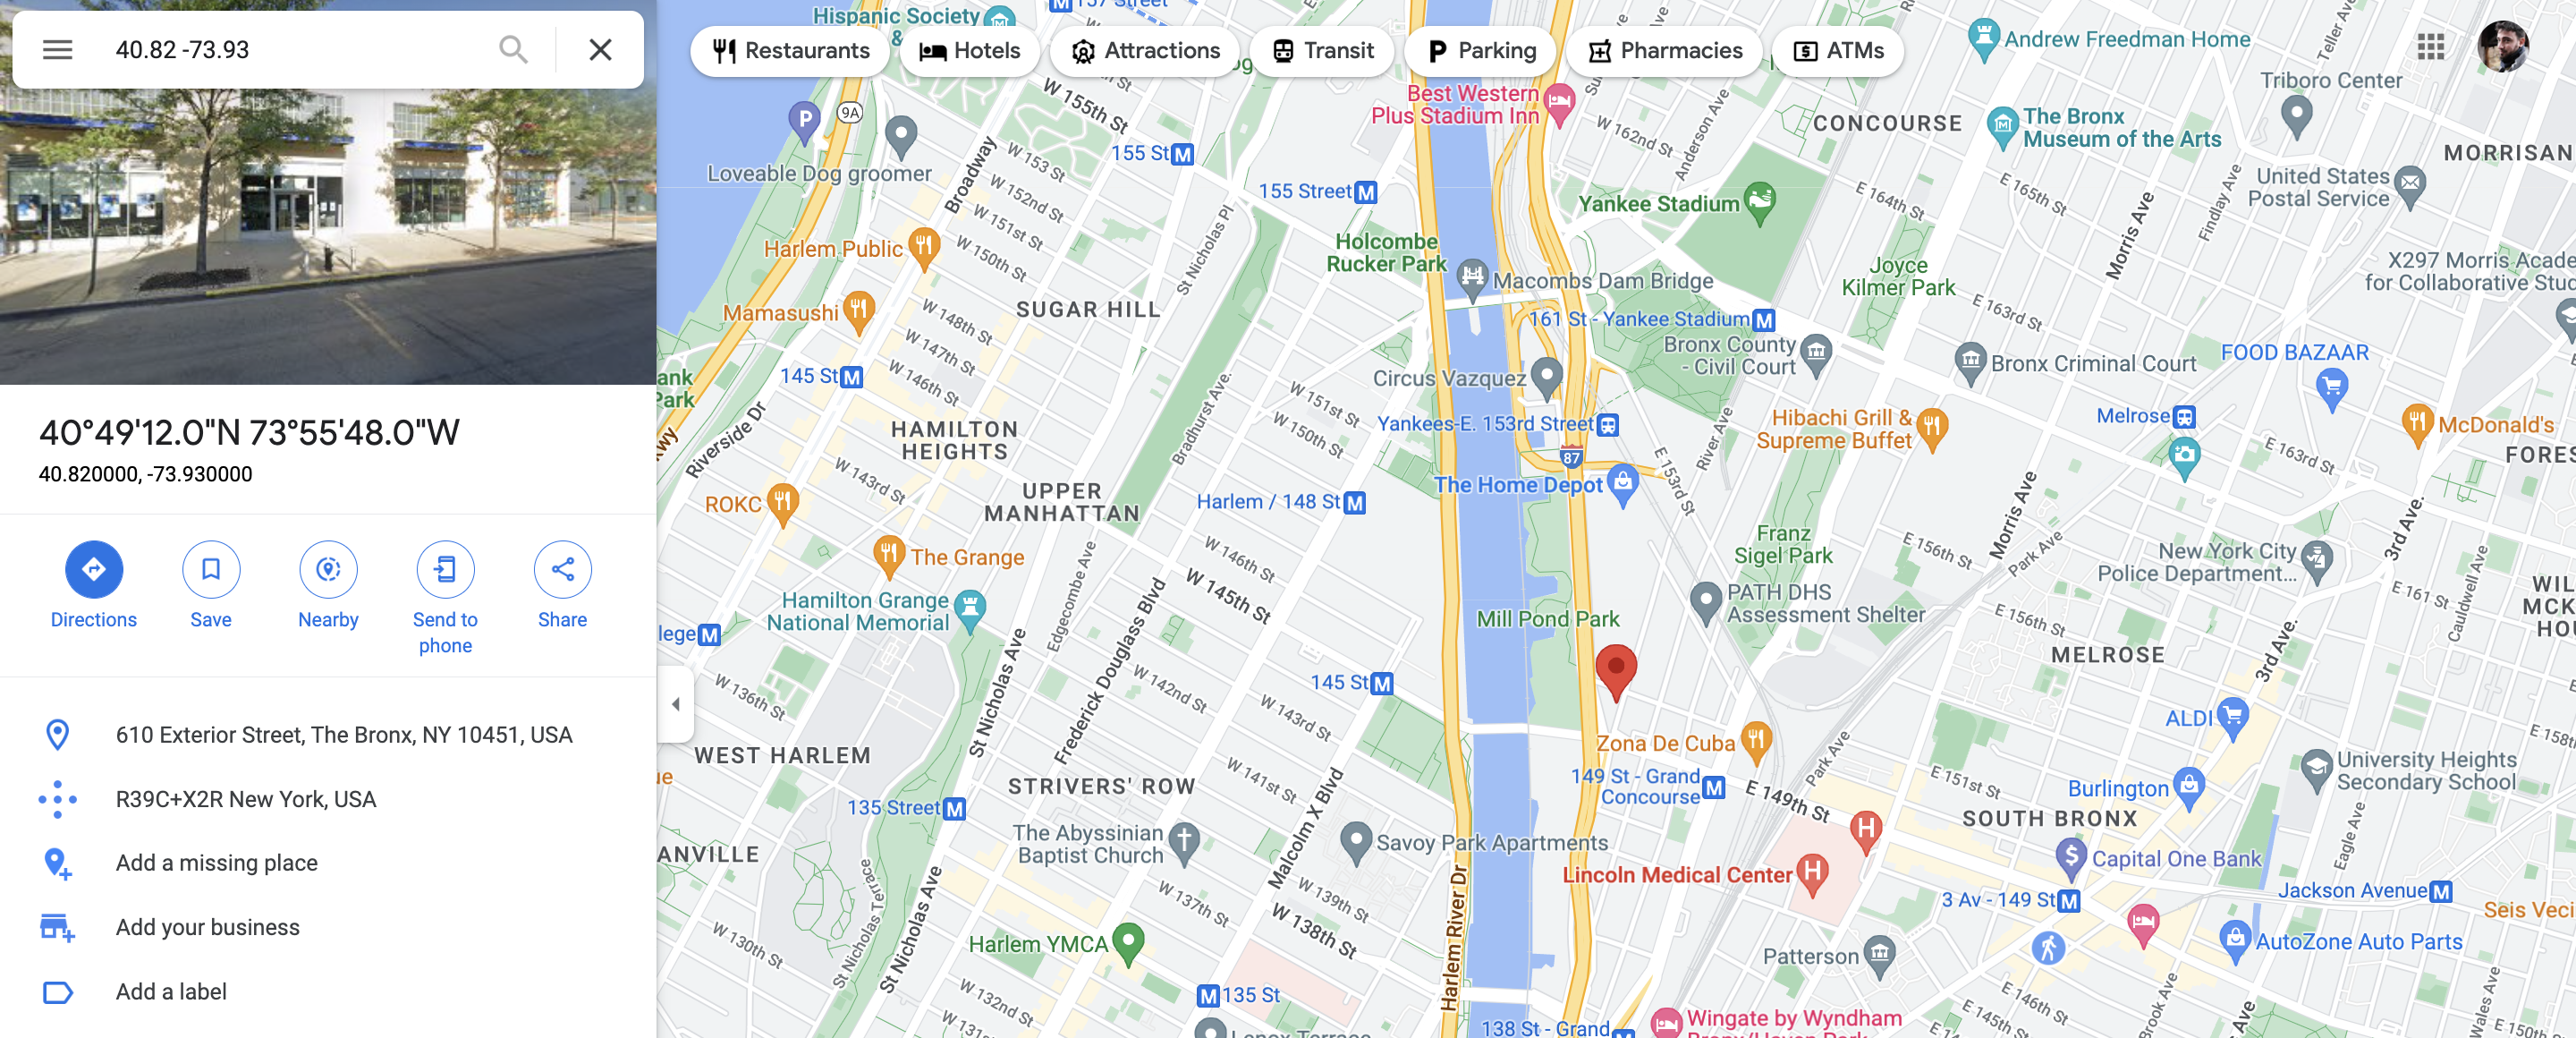

In [ ]:
# Turn things into type_point structure

In [ ]:
# Let's see one neighborhood

The geometry that goes without a dollar is because we are going to look in the neighborhood collection and where the information is inside the key geometry, it can be seen right up here 👆🏻. The geometry that carries dollar is the mongo syntax for all geospatial queries.
To make a geospatial query to Mongo I have to pass the coordinates in point type

`my_location` **$geoIntersects** with which area enclosed in a `polygon` ?

## `GeoWithin`

![](https://www.mongodb.com/docs/manual/images/geospatial-polygon-hells-kitchen.png)

In [ ]:
hells_kitchen = {
   "geometry": {
      "type": "Polygon",
      "coordinates": [[
         [ -73.99, 40.75 ],
         [ -73.98, 40.76 ],
         [ -73.99, 40.75 ]
      ]]
    },
    "name": "Hell's Kitchen"
}

what `venus/locations/things` are **$geoWithin** `polygon`?

**What restaurants can I find in this neighborhood?**

- Collection: `nyneigh` 
- Collection: `nyrest`


- Result: list of restaurants in a given area

In [ ]:
# 1. NEIGHBORHOODS

In [ ]:
# 2. RESTAURANTS

In [ ]:
# 3. THE RESULT

## Near

**What restaurants can I find close to me?**

- Location: `my_coordinates`
- Collection: `nyrest`

- Result: list of restaurants close to me

What elements are located at a distance from a given geometry?
`$nearSphere`/`$near` and `$maxDistance` help us find all elements within `maxDistance` meters of the desired geometry, **ordered** from closest to furthest.

In [ ]:
#  My location
updated_location = [-73.93, 40.82]

## We test Geoqueries with real data

- Districts: `jsons-input/distritos.json` - original data from [here](https://team.carto.com/u/jsanz/tables/distritos/public)

**What neighborhood is IH Madrid located in?**

- Location: `IH_coordinates`
- Collection: `districts`

- Result: neighborhood

I see that the value of "Features" is the list of dictionaries where the polygons are. Each dictionary is a district. So I extract features and load it into a json called districts_well

I bring back the geocode function that gave me the latitude and longitude of a string directly in point type

I take out the Ironhack type point to find what district it is in (I'm going to search my own collection of Madrid districts)

It turns out that my polygons in the gejson that I have downloaded have the latitude and longitude backwards, so I am going to reverse the query

## Let's find the bookstores that are near my house

**What are the closest bookstores to my house?**

- Location: `my_coordinates`
- Collection: `bookstores`

- Result: list of closeby bookstores

- Madrid: bookstores `jsons-output/librerias.json`  - original data: we exported it before

fer = {"type": "Point", "coordinates": [40.4107173, -3.7095711]}

## Collections summary

### Import into Compass
- NY restaurants `jsons-input/nyrestaurants.json` as **nyrest** on MongoCompass, [source]()
- NY neighborhoods `jsons-input/nyneighborhoods.json` as **nyneigh** on MongoCompass [source](https://raw.githubusercontent.com/mongodb/docs-assets/geospatial/restaurants.json)
- Districts: `jsons-output/just_districts.json` as **districts** [source](https://team.carto.com/u/jsanz/tables/distritos/public)
- Madrid: bookstores `jsons-output/librerias.json` as **bookstores** - original data: we exported it before

- You'll also need to have: `jsons-input/distritos.geojson`

- You'll also need to have: `jsons-input/distritos.geojson`

### Into Jupyter

In [ ]:
nyrest = db.get_collection("nyrest")
nyneigh = db.get_collection("nyneigh")
dis = db.get_collection("districts")
books = db.get_collection("bookstores")

### Set some indexes

In [ ]:
db.nyrest.create_index([("location", GEOSPHERE)])
db.nyneigh.create_index([("geometry", GEOSPHERE)])
db.bookstores.create_index([("location", GEOSPHERE)])

## Other interesting info: 

- [BCN districts geoJSONs](https://github.com/martgnz/bcn-geodata/blob/master/districtes/districtes.json)